<a href="https://colab.research.google.com/github/ZMK94/Health-Care-Cost-Analysis/blob/main/Healthcare_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Healthcare Costs by Visit type

In thi snotebook we will explore various factors that contribute to the cost of a patients visist across multiple hospitals to test to see what underlying factors contribute to the cost of that visit.

By exploring variables like visit type, medical condition, and comparing their billing cots we can see if patinet billing is consistent accross multiple hospitals as well as explore why certian visits may cost more than others.

This analysis aims to help illuminate key contributing factors to patinet billing that can be used and understood by healthcare providers and patients alike. Making the process of patiet billing more clear and easily understood is essential to improving people's trust in the helathcare systems as a whole.

## Loading and preparing the data

We will begin b y loading in our helthcare data. This data is hosted by Kaggle and you can download the data as well as learn more about the dataset at : https://www.kaggle.com/datasets/prasad22/healthcare-dataset

We will load in the data that is stored on the google drive, this will require connecting to google drive.

As a note if you wish to be able to run this notebook yourself you must first store your data on your goolge drive, and then allow the notebook access to the drive when prompted. If you choose to store the data somewhere other than your home diretory it will require you to also change the path in the next cell to the correct path to where your data is stored.



In [ ]:
import pandas as pd
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Read the CSV file from your Google Drive
filename = '/content/drive/My Drive/healthcare_dataset.csv'
df = pd.read_csv(filename)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


With the data now loaded we can begin to explore the dataframe. We will start by checking for missing data

In [ ]:
#check for missing data

df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

As we can see our dataset is clean, this means we do not need to do any data clean up. Data will not always be clean like this and it is important to always check and have a plan to address missing data.

## Data Exploration

We will now start to explore our data to give us an idea of what our data looks like. We will answer questions The following questions

*   How many Rows are there?
*   What are the summary stats of Billing amount?
*   How many distinct values are there for hospital, medical condition, and admission type
*   What are the counts of records for each hospital, medical condition, and billing type



In [ ]:
print('There are', len(df), 'rows in the dataset')

There are 55500 rows in the dataset


In [ ]:
print(df['Billing Amount'].describe())

count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: Billing Amount, dtype: float64


In [ ]:
print(df['Hospital'].nunique())
print(df['Medical Condition'].nunique())
print(df['Admission Type'].nunique())

39876
6
3


In [ ]:
print(df['Hospital'].value_counts())
print(df['Medical Condition'].value_counts())
print(df['Admission Type'].value_counts())

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


In [ ]:
# show the top 10 hospitals by count

print(df['Hospital'].value_counts().head(10))


Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Smith Group    36
Johnson Inc    35
Smith Inc      34
Smith LLC      32
Group Smith    32
Name: count, dtype: int64


In [ ]:
# prompt: show the rows where the billing amount is less than 0

df[df['Billing Amount'] < 0]


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.865186,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.917419,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.663795,122,Urgent,2019-06-12,Ibuprofen,Abnormal


## Initial Findings

*   The range of values in the Patient billing column includes values of less than 0, these are likely billing related activites where patients were credited some amount, for our analysis these 108 rows will not be included.

*   There are too many individual hospitals at 39,876 to do any testing based on hospital, instead we will include all hospitals and explore admission type and medical condition for our tests.

## Distribution and Visual Analysis

We will ow explore the various aspects of our data visually by looking at how Billing Cost is distributed as well as looking at our categorical variables tto check for any patterns that may help us detremine which stats tests will be the best choice for the data.

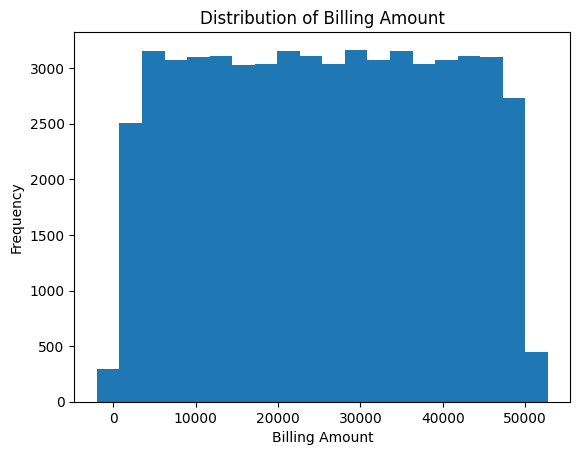

In [ ]:


import matplotlib.pyplot as plt

# Create a histogram of the billing amount
plt.hist(df['Billing Amount'], bins=20)
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Billing Amount')
plt.show()


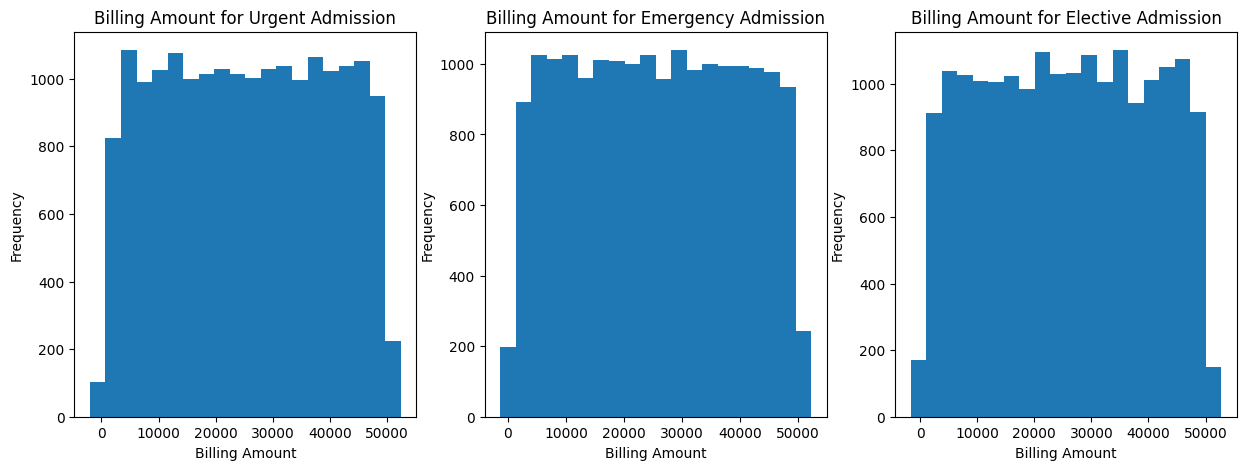

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram of billing amount by visit type
axes[0].hist(df['Billing Amount'][df['Admission Type'] == 'Urgent'], bins=20)
axes[0].set_xlabel('Billing Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Billing Amount for Urgent Admission')

# Plot the histogram of billing amount by admission type
axes[1].hist(df['Billing Amount'][df['Admission Type'] == 'Emergency'], bins=20)
axes[1].set_xlabel('Billing Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Billing Amount for Emergency Admission')

# Plot the histogram of billing amount by admission type
axes[2].hist(df['Billing Amount'][df['Admission Type'] == 'Elective'], bins=20)
axes[2].set_xlabel('Billing Amount')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Billing Amount for Elective Admission')

# Display the figure
plt.show()


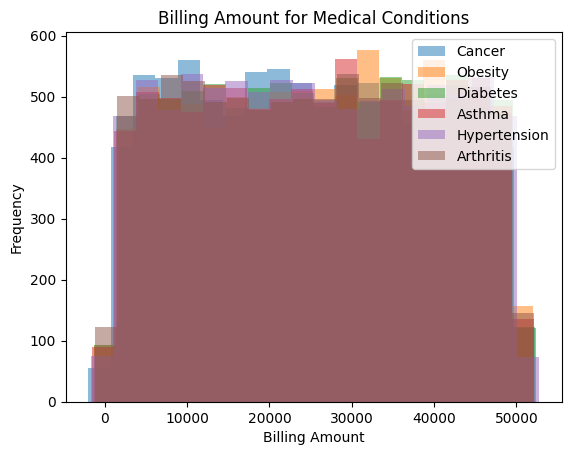

In [ ]:
# Create a dictionary to store the histograms for each medical condition
histograms = {}

# Iterate over the unique medical conditions
for condition in df['Medical Condition'].unique():
    # Create a histogram for the billing amount for the current medical condition
    histograms[condition] = plt.hist(df['Billing Amount'][df['Medical Condition'] == condition], bins=20, alpha=0.5, label=condition)

# Display the histograms together
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Billing Amount for Medical Conditions')
plt.legend()
plt.show()

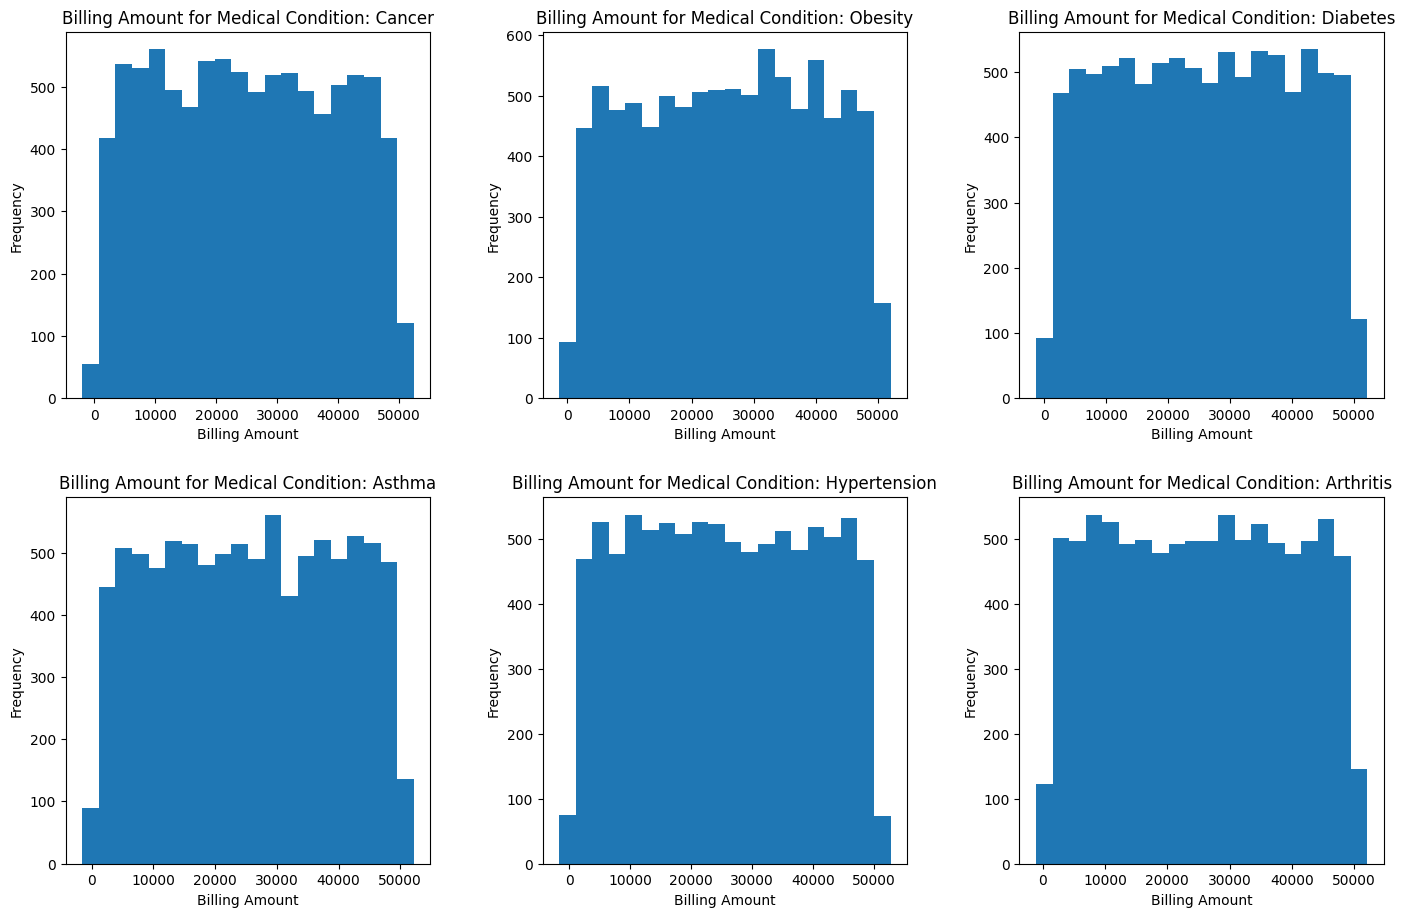

In [ ]:
import matplotlib.pyplot as plt

# Get unique medical conditions
unique_conditions = df['Medical Condition'].unique()

# Calculate the number of rows needed
num_rows = len(unique_conditions) // 3
if len(unique_conditions) % 3 != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5)

# Iterate over the unique medical conditions and plot
for i, condition in enumerate(unique_conditions):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    data = df['Billing Amount'][df['Medical Condition'] == condition]
    ax.hist(data, bins=20)
    ax.set_title('Billing Amount for Medical Condition: {}'.format(condition))
    ax.set_xlabel('Billing Amount')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(unique_conditions), num_rows * 3):
    row = i // 3
    col = i % 3
    axes[row, col].axis('off')

plt.show()


## Analysis of distribution

Based on all the plots above we can conclude that while our data is not a perfect normal distribution it is still close enough to normal that parametric tests will be the best fit for this data

<ipython-input-26-8bf74dd9981a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='Set3')


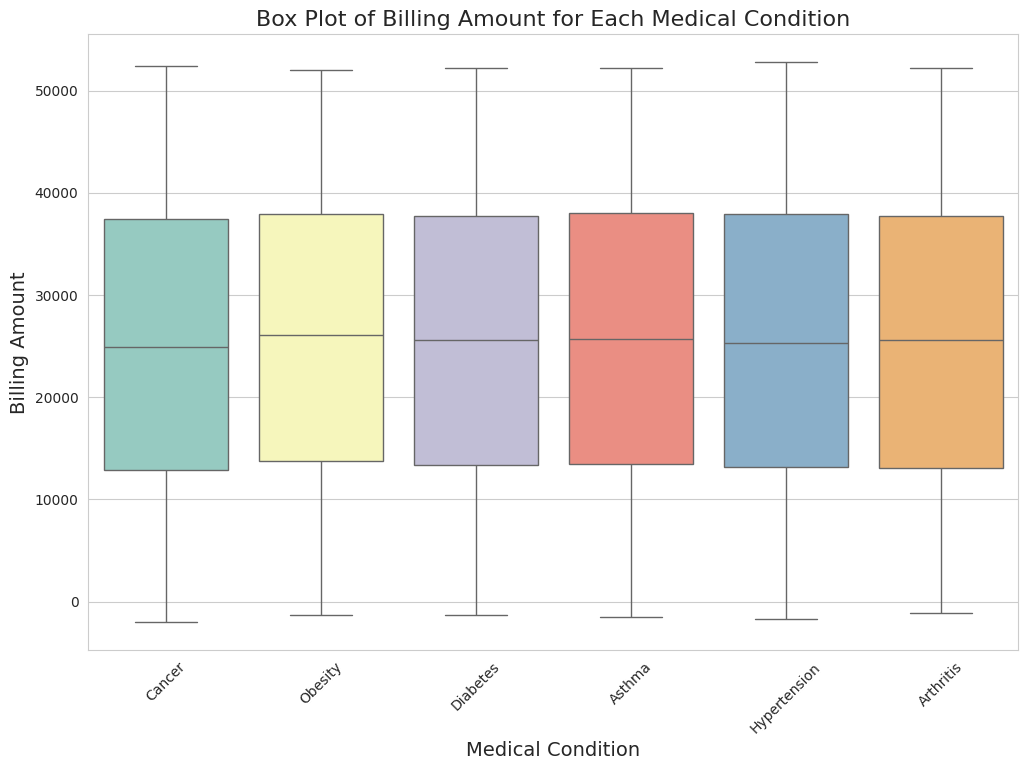

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='Set3')
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Billing Amount', fontsize=14)
plt.title('Box Plot of Billing Amount for Each Medical Condition', fontsize=16)
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-63ae64022206>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='Set3')


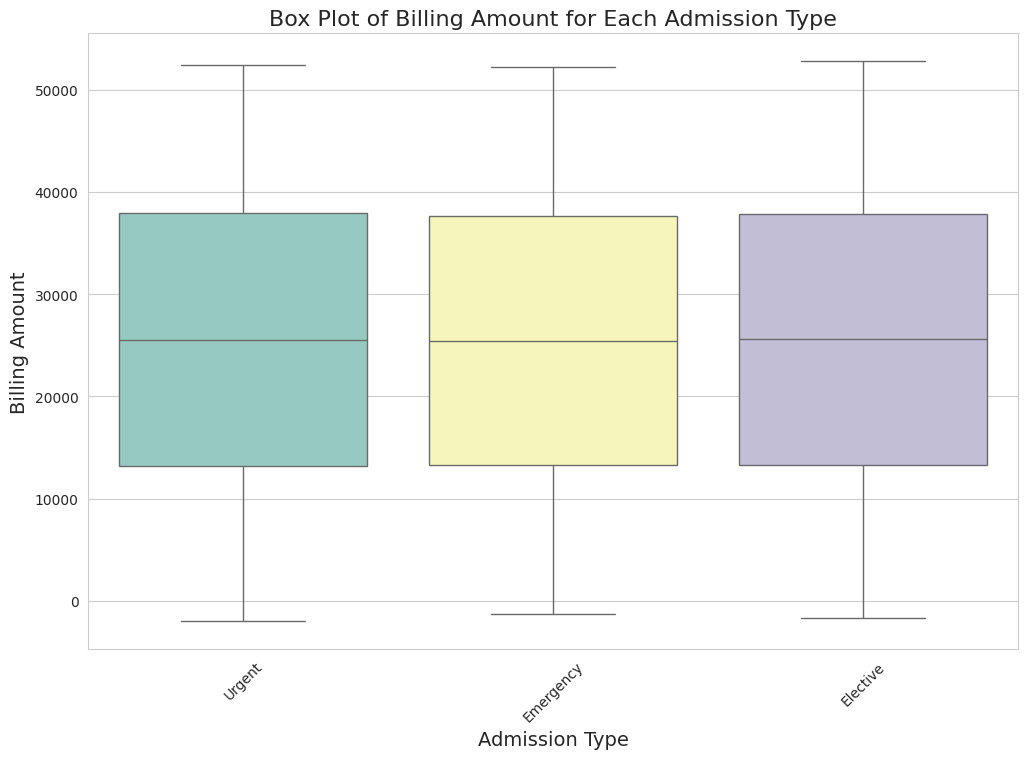

In [ ]:
# Set the style
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='Set3')
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('Billing Amount', fontsize=14)
plt.title('Box Plot of Billing Amount for Each Admission Type', fontsize=16)
plt.xticks(rotation=45)
#plt.legend(title='Admission Type')
plt.show()

## Conclusions based on Visual Analysis

Based on the distributions and the box plots we can see that all the groups are very similar with means and distributions that are nearly identical. This means that a one way Anova will very not tell us very much.

The best test to use based on this will be a pairwise Turkey test to test each combination to see if any admission types and specific diseases has significant differences.

This will give us an idea if there are any combinations worth exploring in more detail or if this data has not enough information to reject the null hypothesis.

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
         group1                   group2           meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------------------------------------
    Elective - Arthritis        Elective - Asthma  -200.4401    1.0 -1461.2602   1060.38  False
    Elective - Arthritis        Elective - Cancer   256.8456    1.0  -999.3743 1513.0655  False
    Elective - Arthritis      Elective - Diabetes   541.3812 0.9913  -723.9522 1806.7146  False
    Elective - Arthritis  Elective - Hypertension   135.2975    1.0 -1113.8592 1384.4541  False
    Elective - Arthritis       Elective - Obesity   235.1187    1.0 -1031.7794 1502.0168  False
    Elective - Arthritis    Emergency - Arthritis    73.2734    1.0 -1186.9399 1333.4867  False
    Elective - Arthritis       Emergency - Asthma    436.566 0.9994  -834.6786 1707.8106  False
    Elective - Arthritis       Emergency

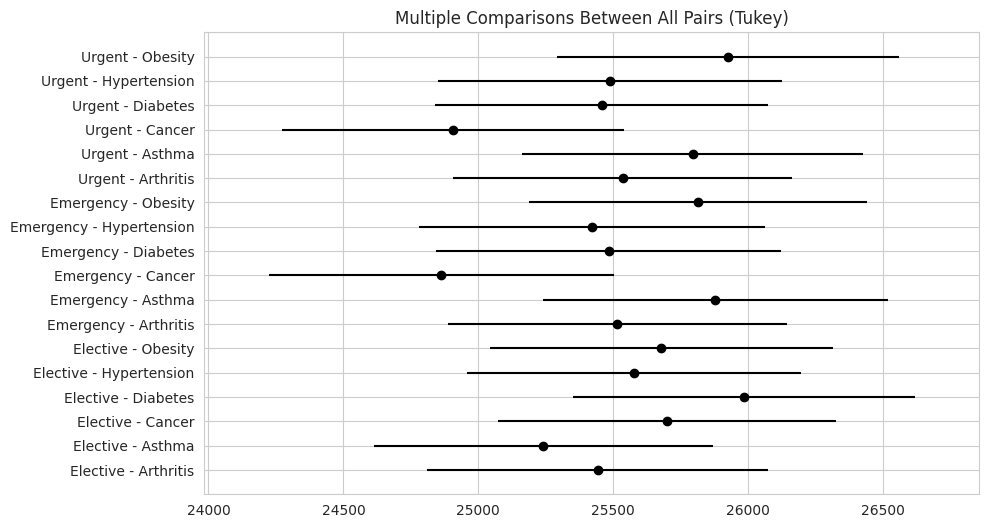

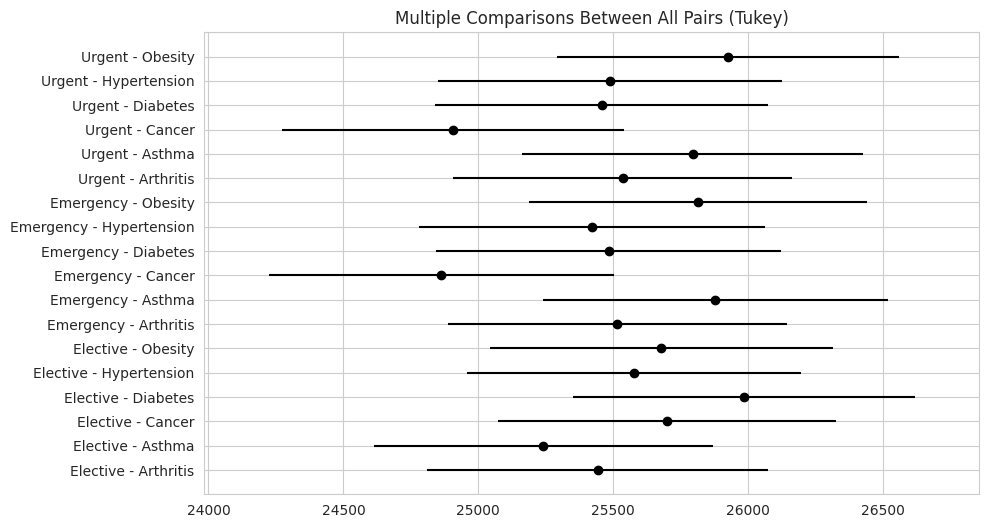

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming your DataFrame is named df and has the columns 'Admission Type', 'Medical Condition', and 'Billing Amount'

# Create a new column that combines 'Admission Type' and 'Medical Condition'
df['Group'] = df['Admission Type'] + ' - ' + df['Medical Condition']

# Prepare the data for the Tukey HSD test
multi_comp = MultiComparison(df['Billing Amount'], df['Group'])

# Perform the Tukey HSD test
tukey_result = multi_comp.tukeyhsd()

# Print the results
print(tukey_result)

# Plot the results (optional)
tukey_result.plot_simultaneous()

## Conclusion

Based on the results using the p value for each test we can see that all the combination fail to reject the null, this means that our data doe snot suggest that admission type or medical condition have a significant impact on the billing amount.

While this data does help us draw this conclusion it also should be questioned why these results make this conclusion. One important factor to consider is that there were not enoughr ecoreds for any individual hosptical to run a proer test, as the max rpws for any single hospital was less than 50. This meant we could not control by hospital.

Additionally this only looked at a very small smaple of medical conditions, as well as a small amount of records. although 55,000 might seem like a lot, it is important to remember millions of patientes are seen daily in the US alone.

So while our data was not able to support the hypothesis that medical condition and admission type contribute to billing costs it does not mean that there is not connection there, and that more data could show a more accurate pricute.

Lastly, if it is true that there is no conenction to billing cost, then it raises the question of what does contribute to billing costs, and how can patients learn more, as well as what can hospitals do to improve transparency into billing costs for their services.